# Initial findings in Books

## I. Books: general information

### Importing Data

Importing relevant pachages:

In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
import re

In [2]:
df_book_noDict = pd.read_csv('../Data/processed/books/books_noDict.csv')
df_book_noDict_year = pd.read_csv('../Data/processed/books/books_noDict_year.csv')

### Initial Findings

### 1. Average rating and number of pages

The first inspection that we try is about the average_rating and the number of pages, with additional information about the format of the books (e-book or not). Only books publised between 1800 and now are considered.

We are dealing with a dataset with more than 800 thousand of rows. The first three scatter plots only include the 20% of data, chosen aleatory.

In [3]:
df_sample_noDict_year = df_book_noDict_year.sample(frac=0.01, random_state=42)

##### Relation between publication year and average rating: Along the time, we could detect some trends?

As we could expect, we find more book publications in recent years with respect to the past century. How is the evaluation of readers to books from past century? How is right now? 

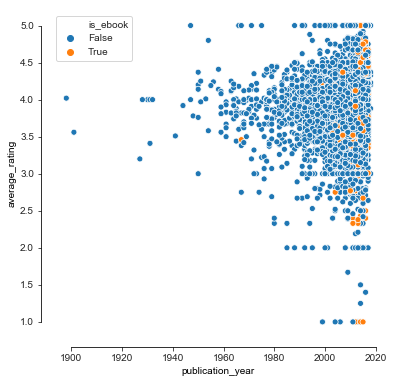

In [4]:
f, ax = plt.subplots(figsize=(6, 6))
sns.set_style("white")
df_book_subset = df_sample_noDict_year[(df_sample_noDict_year.average_rating > 0) & \
                                (df_sample_noDict_year.publication_year < 2020) & \
                                (df_sample_noDict_year.publication_year > 1800)]
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="publication_year", y="average_rating",
                     hue="is_ebook",
                     data=df_book_subset)
_ = sns.despine(offset=10, trim=True)

/Users/daniela/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


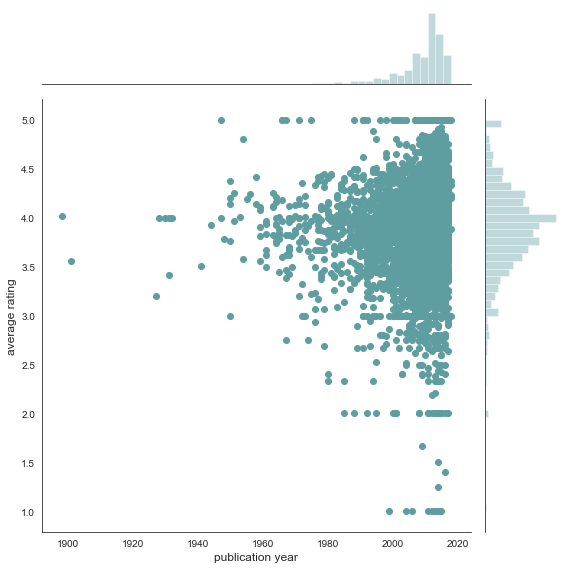

In [5]:
g = sns.jointplot(x="publication_year", y="average_rating", data=df_book_subset, height=8, color='cadetblue')
g.set_axis_labels('publication year', 'average rating', fontsize=12)

We apply pairs bootstrapping measuring the pearson correlation coefficient between the two interest variables to know if this sample used is representative or not.

In [6]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)
    # Return entry [0,1]
    return corr_mat[0,1]

In [7]:
def pairs_bootstrap(data1, data2, func, n):
    
    p = np.empty(n)
    
    for i in range(n):
        inds = np.arange(len(data1))
        bs_inds = np.random.choice(inds, len(data1))
        bs_data1 = data1[bs_inds]
        bs_data2 = data2[bs_inds]
    
        p[i] = func(bs_data1, bs_data2)
    
    return p

In [8]:
# pearson = pairs_bootstrap(df_reviews_sentences['Polarity_Pattern'], \
#                           df_reviews_sentences['Subjectivity_Pattern'], \
#                           pearson_r, 1000)

In [9]:
# p_value = np.sum(pearson >= p_obs)/len(pearson)
# p_value

In [10]:
# if p_value >= alpha:
#     print('Fail to reject the null hypothesis')
# else:
#     print('Reject the null hypothesis')
# Reject the null hypothesis

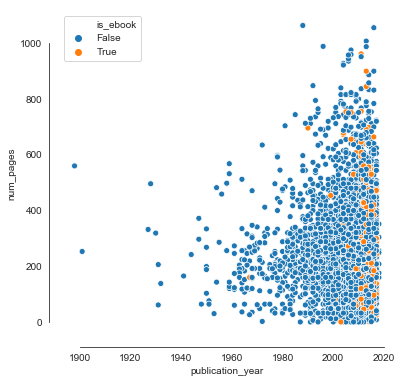

In [11]:
f, ax = plt.subplots(figsize=(6, 6))
sns.set_style("white")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="publication_year", y="num_pages",
                     hue="is_ebook",
                     data=df_book_subset)
_ = sns.despine(offset=10, trim=True)

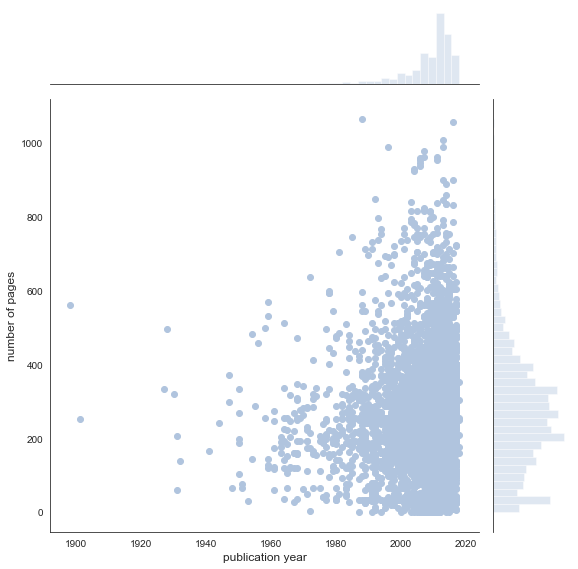

In [12]:
g = sns.jointplot(x="publication_year", y="num_pages", data=df_book_subset, height=8, color='lightsteelblue')
g.set_axis_labels('publication year', 'number of pages', fontsize=12)

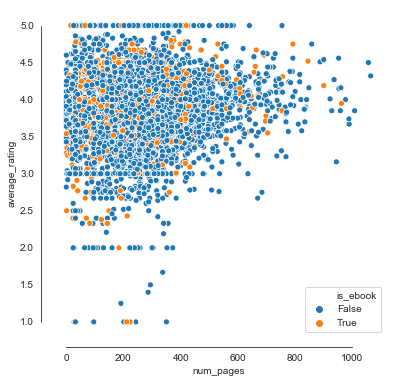

In [13]:
f, ax = plt.subplots(figsize=(6, 6))
sns.set_style("white")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="num_pages", y="average_rating",
                     hue="is_ebook",
                     data=df_book_subset)
_ = sns.despine(offset=10, trim=True)

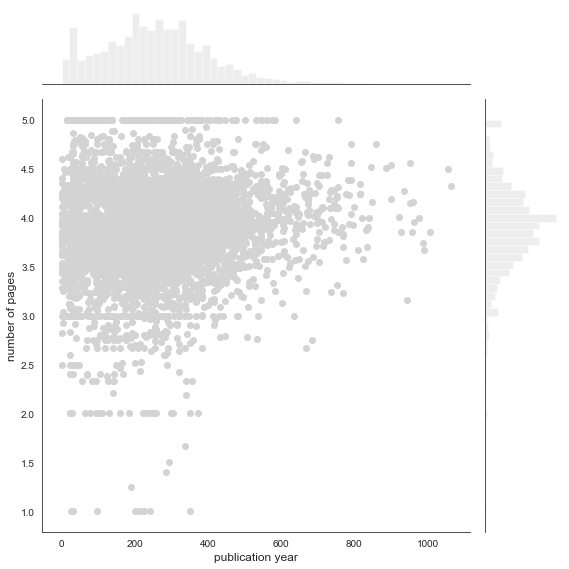

In [14]:
g = sns.jointplot(y="average_rating", x="num_pages", data=df_book_subset, height=8, color='lightgrey')
g.set_axis_labels('publication year', 'number of pages', fontsize=12)

In [15]:
df_sample_groubyYear = df_sample_noDict_year.groupby('publication_year')

In [17]:
df_sample_groubyYear.head(10)

Unnamed: 0        asin  \
479810      325035         NaN   
197537      339148         NaN   
212262      364300         NaN   
446312      267097         NaN   
473312      313710         NaN   
89217       153189         NaN   
340770       85295         NaN   
27774        47649         NaN   
406079      197865         NaN   
239694      411354         NaN   
250063      429153         NaN   
9139         15860         NaN   
83056       142700         NaN   
448682      271199         NaN   
198056      340013         NaN   
158946      273119         NaN   
378754      150667         NaN   
426017      231986         NaN   
428752      236646         NaN   
405121      196228         NaN   
82949       142498  B00R3JKYTI   
18880        32551         NaN   
68298       117329         NaN   
62531       107400         NaN   
223833      384183         NaN   
302436       19077         NaN   
415704      214162         NaN   
146801      252347  B015TSIDVA   
490186      342711  B000QRIGH6   
568467      477571         NaN   
...            ...         ...   
563275      468592         NaN   
111877      192217         NaN   
432568      243218         NaN   
454540      281199         NaN   
439926      256038         NaN   
580030      497569         NaN   
408185      201461         NaN   
362631      122944         NaN   
265488      455767         NaN   
232382      398933         NaN   
98735       169613         NaN   
77072       132470         NaN   
118506      203584         NaN   
139444      239647         NaN   
71837       123357         NaN   
230492      395729         NaN   
308353       29229         NaN   
259727      445936         NaN   
140499      241441         NaN   
332711       71454         NaN   
455356      282629         NaN   
288822      495802         NaN   
370575      136673         NaN   
51512        88610         NaN   
312195       35933         NaN   
375069      144364         NaN   
484899      333780         NaN   
296531        9024         NaN   
36854        63442         NaN   
3866          6701         NaN   

                                                  authors  average_rating  \
479810            [{'author_id': '15817234', 'role': ''}]            4.00   
197537               [{'author_id': '73574', 'role': ''}]            4.45   
212262             [{'author_id': '1259424', 'role': ''}]            3.80   
446312              [{'author_id': '247313', 'role': ''}]            4.24   
473312  [{'author_id': '7419', 'role': ''}, {'author_i...            4.15   
89217              [{'author_id': '8079945', 'role': ''}]            5.00   
340770            [{'author_id': '10928699', 'role': ''}]            4.18   
27774              [{'author_id': '3090079', 'role': ''}]            3.97   
406079            [{'author_id': '14758397', 'role': ''}]            5.00   
239694              [{'author_id': '367791', 'role': ''}]            3.68   
250063             [{'author_id': '1087427', 'role': ''}]            2.19   
9139    [{'author_id': '947', 'role': ''}, {'author_id...            3.97   
83056   [{'author_id': '61015', 'role': ''}, {'author_...            3.16   
448682             [{'author_id': '4110344', 'role': ''}]            3.75   
198056  [{'author_id': '3099175', 'role': ''}, {'autho...            3.93   
158946             [{'author_id': '7855179', 'role': ''}]            3.62   
378754  [{'author_id': '1366990', 'role': ''}, {'autho...            4.17   
426017             [{'author_id': '1050482', 'role': ''}]            3.58   
428752               [{'author_id': '18327', 'role': ''}]            4.12   
405121  [{'author_id': '4236696', 'role': ''}, {'autho...            4.10   
82949   [{'author_id': '6519692', 'role': ''}, {'autho...            4.47   
18880   [{'author_id': '3123196', 'role': ''}, {'autho...            4.47   
68298               [{'author_id': '359769', 'role': ''}]            3.10   
62531                [{'author_id': '15873', 'role'

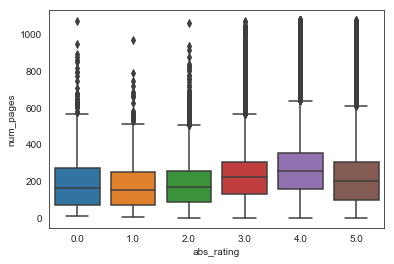

In [18]:
ax = sns.boxplot(x="abs_rating", y="num_pages", data=df_book_noDict)

Delete Nan and publication years before 1900 and after 2020:

In [19]:
df_book_noDict_year = df_book_noDict[(df_book_noDict.publication_year < 2020) & \
                                     (df_book_noDict.publication_year > 1900)]

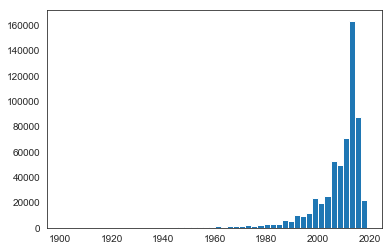

In [20]:
_ = plt.hist(df_book_noDict_year.publication_year, bins=50)
plt.show()

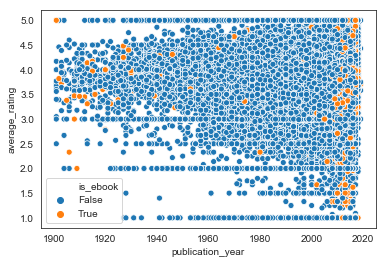

In [21]:
df_book_1 = df_book_noDict_year[(df_book_noDict_year.num_pages < 10000) & (df_book_noDict_year.average_rating > 0)]
ax = sns.scatterplot(x="publication_year", y="average_rating",
                     hue="is_ebook",
                     data=df_book_1)

In [22]:
df_languages = df_book_noDict.groupby("language_code").count()
df_languages = df_languages[df_languages.asin > 100]

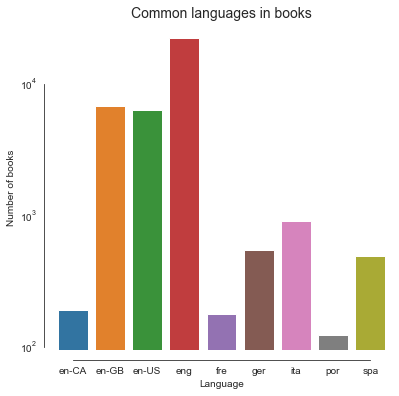

In [23]:
f, ax = plt.subplots(figsize=(6, 6))
_ = sns.set_style("white")
ax = sns.barplot(x=df_languages.index, y='asin', data=df_languages)
ax.set_yscale('log')
_ = plt.xlabel('Language', fontsize=10)
_ = plt.ylabel('Number of books', fontsize=10)
_ = plt.title('Common languages in books', fontsize=14)
_ = sns.despine(offset=10, trim=True)

In [24]:
l = []
for language in df_book_noDict['language_code']:
    if language in ['en-CA', 'en-GB', 'en-US', 'eng', 'en']:
        l.append('eng')
    else:
        l.append(language)

df_book_noDict['language'] = l      
df_languages = df_book_noDict.groupby("language").count()
df_languages = df_languages[df_languages.asin > 50]

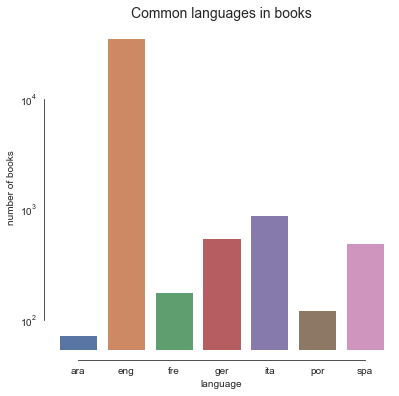

In [25]:
f, ax = plt.subplots(figsize=(6, 6))
_ = sns.set_style("white")
ax = sns.barplot(x=df_languages.index, y='asin', data=df_languages, palette="deep")
ax.set_yscale('log')
_ = plt.xlabel('language', fontsize=10)
_ = plt.ylabel('number of books', fontsize=10)
_ = plt.title('Common languages in books', fontsize=14)
_ = sns.despine(offset=10, trim=True)

In [26]:
df_book_english = df_book_noDict_year[(df_book_noDict_year.language_code == 'eng') |
                                      (df_book_noDict_year.language_code == 'en-CA') |
                                      (df_book_noDict_year.language_code == 'en-GB') |
                                      (df_book_noDict_year.language_code == 'en-US') |
                                      (df_book_noDict_year.language_code == 'en')]

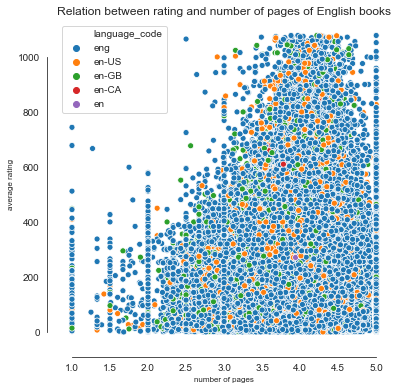

In [27]:
f, ax = plt.subplots(figsize=(6, 6))
sns.set_style("white")
df_book_2 = df_book_english[(df_book_english.num_pages < 10000) & (df_book_english.average_rating > 0)]
ax = sns.scatterplot(y="num_pages", x="average_rating",
                     hue="language_code",
                     data=df_book_2)
_ = plt.xlabel('number of pages', fontsize=8)
_ = plt.ylabel('average rating', fontsize=8)
_ = plt.title('Relation between rating and number of pages of English books', fontsize=12)
_ = sns.despine(offset=10, trim=True)

In [28]:
df_book_2['abs_rating'] = round(df_book_2.average_rating)


/Users/daniela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/Users/daniela/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/daniela/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


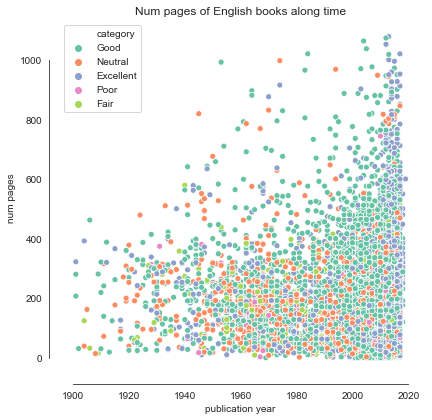

In [29]:
df_book_2.loc[df_book_2.average_rating == 1, 'category'] = 'Poor'
df_book_2.loc[df_book_2.average_rating == 2, 'category'] = 'Fair'
df_book_2.loc[df_book_2.average_rating == 3, 'category'] = 'Neutral'
df_book_2.loc[df_book_2.average_rating == 4, 'category'] = 'Good'
df_book_2.loc[df_book_2.average_rating == 5, 'category'] = 'Excellent'

f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.set_style("white")
ax = sns.scatterplot(x="publication_year", y="num_pages",
                     hue="category",
                     palette='Set2',
                     data=df_book_2)
_ = plt.xlabel('publication year')
_ = plt.ylabel('num pages')
_ = plt.title('Num pages of English books along time')
_ = sns.despine(offset=10, trim=True)

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [30]:
df_book_popular_languages = df_book_noDict_year[(df_book_noDict_year.language_code == 'eng') |
                                      (df_book_noDict_year.language_code == 'en-CA') |
                                      (df_book_noDict_year.language_code == 'en-GB') |
                                      (df_book_noDict_year.language_code == 'en-US') |
                                      (df_book_noDict_year.language_code == 'en') |
                                      (df_book_noDict_year.language_code == 'fre') |
                                      (df_book_noDict_year.language_code == 'ge') |
                                      (df_book_noDict_year.language_code == 'spa') |
                                      (df_book_noDict_year.language_code == 'por') |
                                      (df_book_noDict_year.language_code == 'ita') |
                                      (df_book_noDict_year.language_code == 'ara')]

In [31]:
df_book_romance = df_book_noDict_year[
                                      (df_book_noDict_year.language_code == 'fre') |
                                      (df_book_noDict_year.language_code == 'spa') |
                                      (df_book_noDict_year.language_code == 'por') |
                                      (df_book_noDict_year.language_code == 'ita')]

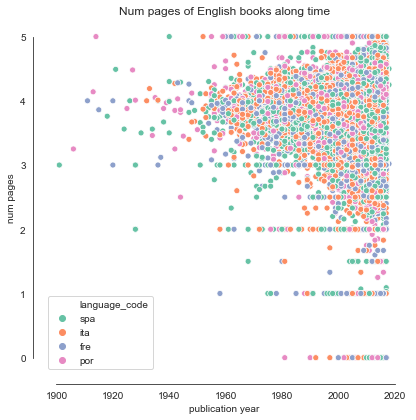

In [32]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.set_style("white")
ax = sns.scatterplot(x="publication_year", y="average_rating",
                     hue="language_code",
                     palette='Set2',
                     data=df_book_romance)
_ = plt.xlabel('publication year')
_ = plt.ylabel('num pages')
_ = plt.title('Num pages of English books along time')
_ = sns.despine(offset=10, trim=True)

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Arabic books

Arabic books are present from.....

In [33]:
df_book_arabe = df_book_noDict[(df_book_noDict.language_code == 'ara') & \
                               (df_book_noDict.publication_year < 2020) &\
                               (df_book_noDict.publication_year > 500)]

In [34]:
df_book_arabe.sort_values('publication_year')

Unnamed: 0        asin  \
291822         690         NaN   
482589      329397         NaN   
358130      114861         NaN   
383024      157711         NaN   
149972      257678         NaN   
1491          2602         NaN   
552439      449510         NaN   
391469      172362         NaN   
485075      333675         NaN   
328265       63452         NaN   
12868        22184         NaN   
249044      427208         NaN   
262637      450668         NaN   
500490      360057         NaN   
291383      499910         NaN   
186764      320483         NaN   
426715      232845         NaN   
328746       64248         NaN   
282398      484532         NaN   
389593      169108         NaN   
500532      360136         NaN   
270663      464400         NaN   
193929      332789         NaN   
447427      268657         NaN   
101118      173658         NaN   
126719      217522         NaN   
465479      299782         NaN   
226704      388933  9786030032   
565428      471842         NaN   
193750      332474         NaN   
...            ...         ...   
474015      314515         NaN   
439219      254427         NaN   
333343       72274         NaN   
47039        80925         NaN   
130393      223781         NaN   
561050      464319         NaN   
478709      322724         NaN   
352921      105943         NaN   
564253      469776         NaN   
525067      402234         NaN   
352604      105386         NaN   
564023      469395         NaN   
230167      394977         NaN   
563874      469141         NaN   
232593      399068         NaN   
233749      401067         NaN   
343276       89291         NaN   
350088      101085         NaN   
562861      467431         NaN   
527574      406467         NaN   
348212       97886         NaN   
562034      466021         NaN   
561752      465542         NaN   
237024      406544         NaN   
238270      408700         NaN   
345433       93123         NaN   
239162      410236         NaN   
349101       99399         NaN   
581700      499930         NaN   
333828       73074         NaN   

                                                  authors  average_rating  \
291822            [{'author_id': '15417760', 'role': ''}]            3.00   
482589             [{'author_id': '1270413', 'role': ''}]            4.38   
358130             [{'author_id': '1270413', 'role': ''}]            4.31   
383024        [{'author_id': '3052820', 'role': 'lkhTT'}]            3.50   
149972  [{'author_id': '3293267', 'role': ''}, {'autho...            4.11   
1491               [{'author_id': '1327003', 'role': ''}]            3.88   
552439             [{'author_id': '3042252', 'role': ''}]            4.04   
391469             [{'author_id': '3004513', 'role': ''}]            4.07   
485075             [{'author_id': '3036541', 'role': ''}]            3.75   
328265             [{'author_id': '3054851', 'role': ''}]            4.33   
12868             [{'author_id': '13958792', 'role': ''}]            4.31   
249044             [{'author_id': '3000730', 'role': ''}]            4.07   
262637            [{'author_id': '15671304', 'role': ''}]            1.00   
500490             [{'author_id': '7392003', 'role': ''}]            3.60   
291383  [{'author_id': '6444175', 'role': ''}, {'autho...            4.04   
186764  [{'author_id': '3305477', 'role': ''}, {'autho...            4.11   
426715             [{'author_id': '5347902', 'role': ''}]            3.65   
328746             [{'author_id': '4671921', 'role': ''}]            2.91   
282398             [{'author_id': '7371697', 'role': ''}]            3.00   
389593             [{'author_id': '3008390', 'role': ''}]            4.28   
500532             [{'author_id': '3054851', 'role': ''}]            4.17   
270663             [{'author_id': '6577582', 'role': ''}]            5.00   
193929             [{'author_id': '3424097', 'role': ''}]            3.60   
447427             [{'author_id': '5292491', 'role'

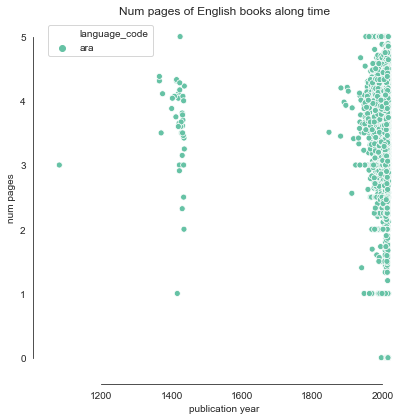

In [35]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.set_style("white")
ax = sns.scatterplot(x="publication_year", y="average_rating",
                     hue="language_code",
                     palette='Set2',
                     data=df_book_arabe)
_ = plt.xlabel('publication year')
_ = plt.ylabel('num pages')
_ = plt.title('Num pages of English books along time')
_ = sns.despine(offset=10, trim=True)

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [36]:
df_top1000 = df_book_noDict_year.sort_values(['publication_year', 'ratings_count', 'average_rating'], ascending=False).head(1000)

In [37]:
df_top1000.loc[:, ['title','publication_year', 'ratings_count', 'average_rating', 'language_code']]

title  publication_year  \
353725      Too Wicked To Kiss (Scoundrels & Secrets, #1)            2019.0   
389051                                        Bảy năm sau            2019.0   
76924   Roses and Thorns: The Reality of My Rock and R...            2019.0   
496888                                  King Grisly-Beard            2019.0   
243111  Jack West Jr and the Hero's Helmet (Jack West ...            2019.0   
64123           All The Gods Below (The Arclight Saga #3)            2019.0   
333828                                             كن أنت            2019.0   
179018                  The Continent (The Continent, #1)            2018.0   
451973                   Force of Nature (Aaron Falk, #2)            2018.0   
556119                          War Storm (Red Queen, #4)            2018.0   
67112                                      The Music Shop            2018.0   
248380                                   The Immortalists            2018.0   
233450                      Zenith (The Androma Saga, #1)            2018.0   
272148                 Magic Triumphs (Kate Daniels, #10)            2018.0   
167786                        Restore Me (Shatter Me, #4)            2018.0   
101062                         Love, Hate & Other Filters            2018.0   
84353                     Shrill: Notes from a Loud Woman            2018.0   
41307                          The Belles (The Belles #1)            2018.0   
186620              Wires and Nerve, Volume 2: Gone Rogue            2018.0   
565399                                        As You Wish            2018.0   
433454  Sleeping Beauty, The One Who Took the Really L...            2018.0   
64051                                       The Chalk Man            2018.0   
330079                      Bayou Born (The Foundling #1)            2018.0   
253180                                    Before I Let Go            2018.0   
142645                Reign the Earth (The Elementae, #1)            2018.0   
135676              Immortal Reign (Falling Kingdoms, #6)            2018.0   
167300                             Everless (Untitled #1)            2018.0   
210030                                    Carnegie's Maid            2018.0   
484387  The Angry Chef: Bad Science and the Truth abou...            2018.0   
542285                    Burn Bright (Alpha & Omega, #5)            2018.0   
...                                                   ...               ...   
526769                                           Sycamore            2017.0   
72696                 Rise of Fire (Reign of Shadows, #2)            2017.0   
577078            Happily ​Ever After (Cinder & Ella, #2)            2017.0   
94578                    The Tea Girl of Hummingbird Lane            2017.0   
486642                 Dead Stop (Sydney Rose Parnell #2)            2017.0   
561850                                       Rebel Rising            2017.0   
54037                                    The Trophy Child            2017.0   
491919                                        The Promise            2017.0   
553072                     The Cutthroat (Isaac Bell #10)            2017.0   
507563                Wake A Sleeping Tiger (Breeds, #31)            2017.0   
482399               Black Hammer, Vol. 1: Secret Origins            2017.0   
258211                        Rescue Me (Heathens Ink, 1)            2017.0   
225400             The Princess Saves Herself in This One            2017.0   
160173   Special Agent In Charge  (The Federal Witch, #3)            2017.0   
217397            Fatal Harmony (The Vein Chronicles, #1)            2017.0   
450634                                      Mrs. Fletcher            2017.0   
45407      Racing the Devil (Inspector Ian Rutledge, #19)            2017.0   
260275             Trust with a Chaser (Rainbow Cove, #1)            2017.0   
39247                                      The Night Mark            2017.0   
143926                 

In [38]:
df_top1000_rating = df_book_noDict_year.sort_values(['ratings_count', 'average_rating', 'publication_year'], ascending=False).head(1000)

In [39]:
df_top1000_rating.loc[:, ['title','publication_year', 'ratings_count', 'average_rating', 'language_code']]

title  publication_year  \
121123                        King's Cage (Red Queen, #3)            2017.0   
450704                                             Psycho            1999.0   
102638                                        Montana Sky            2006.0   
39820                                       Then Came You            2011.0   
164477                                              Ariel            1999.0   
338352                                   A Man Called Ove            2014.0   
57699                                   A Town Like Alice            2000.0   
263581  Packing for Mars: The Curious Science of Life ...            2010.0   
538147              Takedown Twenty (Stephanie Plum, #20)            2013.0   
40971                                The Story About Ping            2000.0   
83892                                The Railway Children            2000.0   
517812             Black Magic Sanction (The Hollows, #8)            2010.0   
219865               The Last Guardian (Artemis Fowl, #8)            2012.0   
173046                                        The Husband            2006.0   
554265                   Wanted (Pretty Little Liars, #8)            2010.0   
154532             The Templar Legacy (Cotton Malone, #1)            2006.0   
484455                                 The Guns of August            2004.0   
528606              Fatal Voyage (Temperance Brennan, #4)            2005.0   
532396                     In Too Deep (The 39 Clues, #6)            2009.0   
453457                Killing Kennedy: The End of Camelot            2012.0   
550813         Eyes Wide Open (The Blackstone Affair, #3)            2013.0   
100075  A Touch of Dead (Sookie Stackhouse, #4.1, #4.3...            2009.0   
26586           Carpe Jugulum (Discworld #23; Witches #6)            1999.0   
273505                                    Just So Stories            2003.0   
42682                      The End of Your Life Book Club            2012.0   
65213                     Divine Justice (Camel Club, #4)            2008.0   
407227                                        Three Junes            2003.0   
330765                                    Lipstick Jungle            2006.0   
401272                                  History of Beauty            2004.0   
168192                                       We Are Water            2013.0   
...                                                   ...               ...   
84335                 Rebel Spring (Falling Kingdoms, #2)            2013.0   
474033                          Insurgent (Divergent, #2)            2012.0   
245157                Daring to Dream (Dream Trilogy, #1)            2006.0   
361157                    Truthwitch (The Witchlands, #1)            2016.0   
128513                          The Summer Before the War            2016.0   
274693                                     Barnyard Dance            1993.0   
409562                                             Marina            1999.0   
497148                                 Are You My Mother?            2012.0   
546490                                     The Second Sex            1989.0   
480186                                          Orthodoxy            2008.0   
267811                                      Danse Macabre            2001.0   
365645                   The Hidden City (The Tamuli, #3)            1995.0   
132328                             Skeletons at the Feast            2008.0   
172649  Avatar: The Last Airbender: The Promise, Part ...            2012.0   
269432                                            Oblomov            2006.0   
452456                        Book of Shadows (Sweep, #1)            2007.0   
269155                                        Immortality            1992.0   
129157            First Among Sequels (Thursday Next, #5)            2007.0   
155753  Writing Down the Bones: Freeing the Writer Within            2006.0   
187491                 

# Books Review preprocessing

#### Inspecting the pattern results:

In [40]:
df_sentiment_reviews = pd.read_csv('../Data/processed/books/sentiment_patterns_books_reviews.csv', index_col=False)

In [42]:
df_sentiment_reviews.head(2)

Unnamed: 0  book_id  has_spoiler  rating                         review_id  \
0           0    16981        False       3  a5d2c3628987712d0e05c4f90798eb67   
1           1    16981        False       4  706a8032efbde550167bf0d96c2ab501   

                                    review_sentences   timestamp  \
0  [[0, 'Recommended by Don Katz.'], [0, 'Avail f...  2017-03-22   
1  [[0, 'This book was actually good, so long tho...  2015-02-25   

                            user_id          title  \
0  8842281e1d1347389f2ab93d60773d4d  Invisible Man   
1  2159f55d397e8fbe68d5e03668e7d9d2  Invisible Man   

                                         description  \
0  First published in 1952 and immediately hailed...   
1  First published in 1952 and immediately hailed...   

                                     text_normalized  polarity_textBlob  \
0  recommended by don katz avail for free in dece...             0.4000   
1  this book wa actually good so long though haha...             0.4125   

   subjectivity_textBlob  sentiment_scores sentiment_category  
0                 0.8000               3.0           positive  
1                 0.5125               9.0           positive

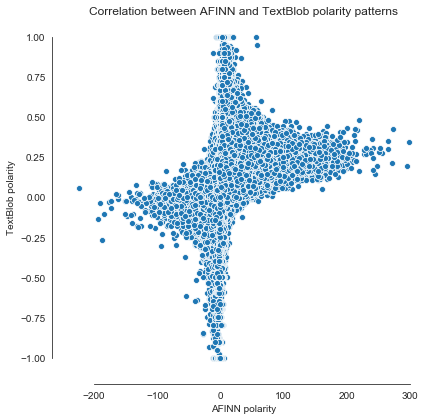

In [43]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.set_style("white")
ax = sns.scatterplot(x='sentiment_scores', y='polarity_textBlob', data=df_sentiment_reviews)
_ = plt.xlabel('AFINN polarity')
_ = plt.ylabel('TextBlob polarity')
_ = plt.title('Correlation between AFINN and TextBlob polarity patterns')
_ = sns.despine(offset=10, trim=True)

In [45]:
#Normalizar antes!

# f, ax = plt.subplots(figsize=(5.5, 5.5))
# _ = sns.set_style("white")
# _ = sns.distplot(afinn_polarity, kde=False, norm_hist=True, label='AFINN')
# _ = sns.distplot(textblob_polarity, kde=False, norm_hist=True, label='TextBlob')
# _ = plt.xlabel('polarity')
# _ = plt.ylabel('distribution')
# _ = plt.title('Polarity distribution')
# _ = sns.despine(offset=10, trim=True)
# _ = plt.legend()

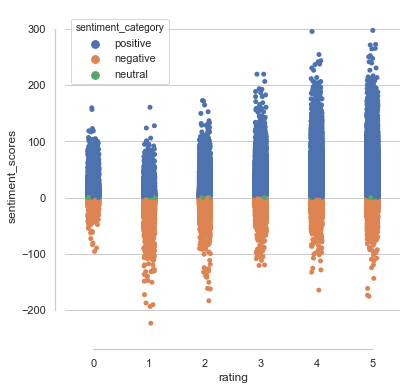

In [47]:
f, ax = plt.subplots(figsize=(6, 6))
_ = sns.set(style="whitegrid")
g = sns.stripplot(x="rating", y="sentiment_scores", hue='sentiment_category', data=df_sentiment_reviews)
sns.despine(offset=10, trim=True)

In [48]:
textBlob_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in df_sentiment_reviews.polarity_textBlob]

df_sentiment_reviews['textBlob_category'] = textBlob_category

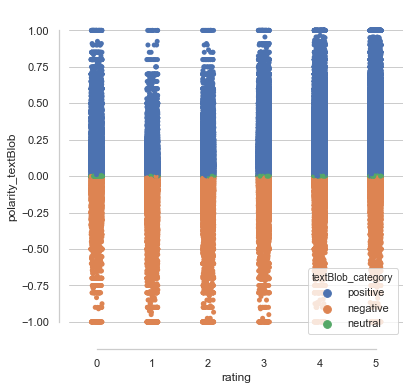

In [49]:
f, ax = plt.subplots(figsize=(6, 6))
_ = sns.set(style="whitegrid")
g = sns.stripplot(x="rating", y="polarity_textBlob", hue='textBlob_category', data=df_sentiment_reviews)
sns.despine(offset=10, trim=True)

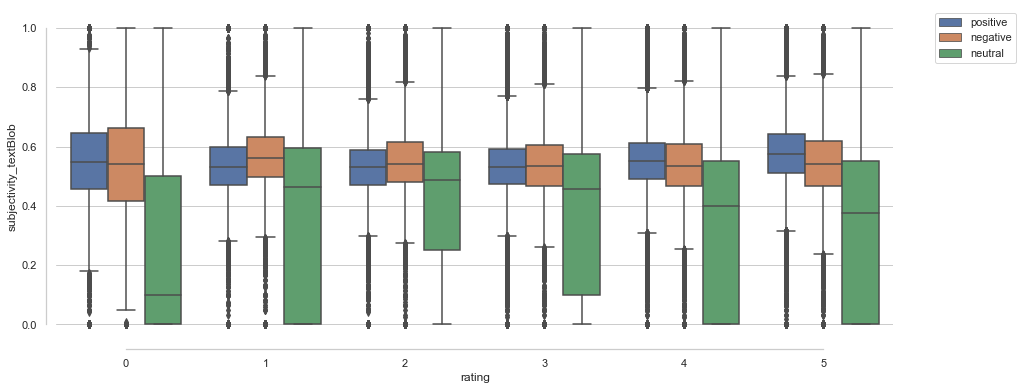

In [50]:
f, ax = plt.subplots(figsize=(15, 6))
_ = sns.set(style="whitegrid")
g = sns.boxplot(x="rating", y="subjectivity_textBlob", hue='sentiment_category', data=df_sentiment_reviews)
sns.despine(offset=10, trim=True)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [51]:
df_sample = df_sentiment_reviews.sample(frac=0.01, random_state=42)

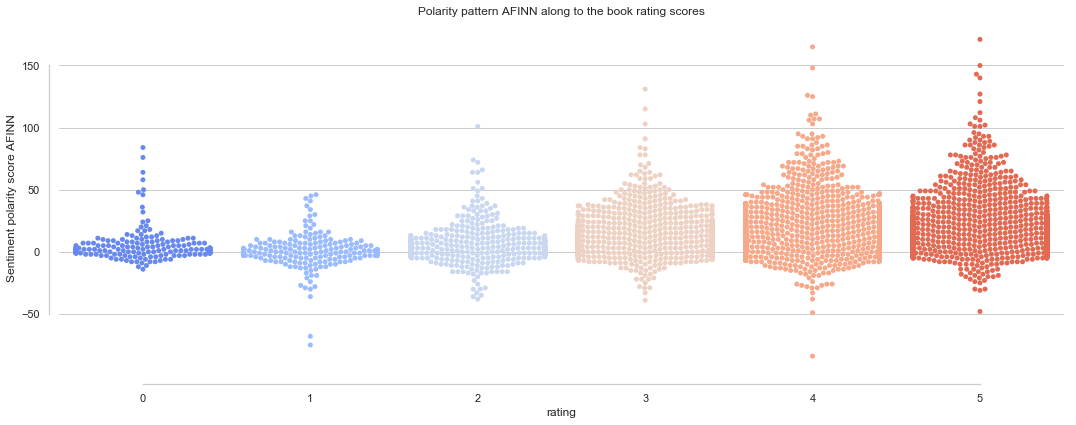

In [52]:
f, ax = plt.subplots(figsize=(18, 6.5))
sns.set_style("white")
ax = sns.swarmplot(x="rating", y="sentiment_scores",
                     palette='coolwarm',
                     data=df_sample)
_ = plt.xlabel('rating')
_ = plt.ylabel('Sentiment polarity score AFINN')
_ = plt.title('Polarity pattern AFINN along to the book rating scores')
_ = sns.despine(offset=10, trim=True)

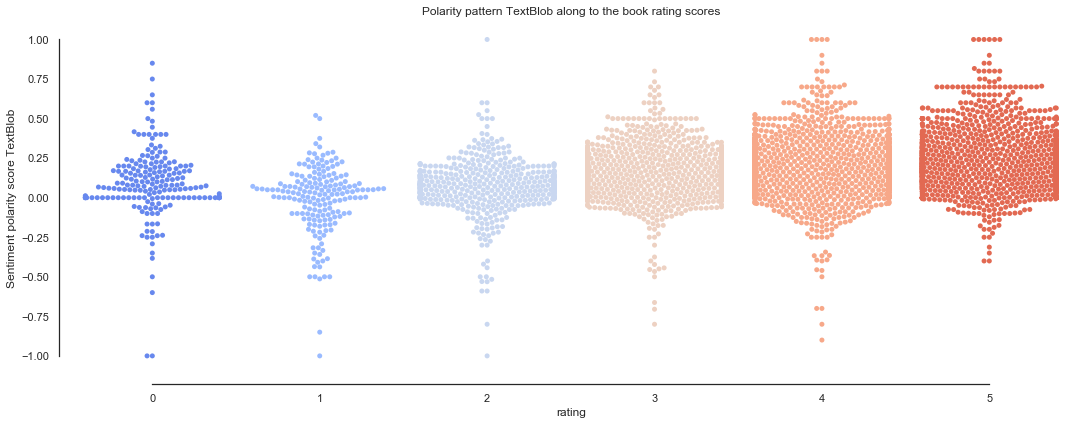

In [53]:
f, ax = plt.subplots(figsize=(18, 6.5))
sns.set_style("white")
ax = sns.swarmplot(x="rating", y="polarity_textBlob",
                     palette='coolwarm',
                     data=df_sample)
_ = plt.xlabel('rating')
_ = plt.ylabel('Sentiment polarity score TextBlob')
_ = plt.title('Polarity pattern TextBlob along to the book rating scores')
_ = sns.despine(offset=10, trim=True)